<h1 color='blue'>Atmospheric Field Work Assignment</h1>

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

In [2]:
data = xr.open_mfdataset('C:/Users/user/Documents/Ukraine/*.nc')
Ukraine = data.where(data != -99.0)

In [3]:
UkraineRR_data = Ukraine.precip
UkraineRR_data

<xarray.DataArray 'precip' (datetime: 3653, lat: 202, lon: 454)>
dask.array<where, shape=(3653, 202, 454), dtype=float64, chunksize=(366, 202, 454), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 22.12 22.16 22.2 22.24 ... 40.12 40.16 40.2 40.24
  * lat       (lat) float32 52.44 52.4 52.36 52.32 ... 44.52 44.48 44.44 44.4
  * datetime  (datetime) datetime64[ns] 2003-01-01 2003-01-02 ... 2012-12-31
Attributes:
    grid_mapping:  crs

<h1 color='blue'>Computing data for analysis</h1>
<ol>
    <li>Monthly rainfall totals</li>
    <li>Longterm climatologies for each month.</li>
    <li>Annual totals and average</li>
    <li>Number of dry (RR<1mm) per month and year</li>
    <li>Number of wet (RR>=1mm) per month and year</li>
    <li>Extreme rainfall indices (RR>10mm;RR>20mm)</li>
</ol>

In [4]:
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthlyRR_data = UkraineRR_data.groupby('datetime.month')
annualRR_data = UkraineRR_data.groupby('datetime.year')

In [5]:
# monthly rainfall totals
monthlyRR_totals = monthlyRR_data.sum('datetime')

# monthly climatologies rainfall totals
monthlyRR_climo = monthlyRR_data.sum('datetime').mean('month')

In [6]:
# annual totals
annualRR_totals = annualRR_data.sum()

# annual climatology totals
annualRR_climo = annualRR_data.sum('datetime').mean('year')

In [7]:
#Question 3
#DRY days per year
annual_dryDays = UkraineRR_data.where(UkraineRR_data < 1).groupby('datetime.year').count('datetime')

#WET days per year
annual_wetDays = UkraineRR_data.where(UkraineRR_data >= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
monthly_dryDays = UkraineRR_data.where(UkraineRR_data < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
monthly_wetDays = UkraineRR_data.where(UkraineRR_data >= 1).groupby('datetime.month').count('datetime')

#Question 4
# Extreme Rainfall >10mm per year
annual_xtremeRR10 = UkraineRR_data.where((UkraineRR_data > 10) & (UkraineRR_data <= 20)).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
annual_xtremeRR20 = UkraineRR_data.where(UkraineRR_data > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
monthly_xtremeRR10 = UkraineRR_data.where((UkraineRR_data > 10) & (UkraineRR_data <= 20)).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
monthly_xtremeRR20 = UkraineRR_data.where(UkraineRR_data > 20).groupby('datetime.month').count('datetime')




<h1 color='blue'>Visualisations for computed data via:</h1>
<ul>
    <li>Time Series</li>
    <li>Spatial Plot</li>
    <li>Time: Month | Year</li>
</ul>

<h2 color='blue'>Time Series Plot</h2>
<ul>
    <li>Annual Totals</li>
    <li>Dry days</li>
    <li>Wet Days</li>
    <li>Extreme Rainfall</li>
</ul>

<p>Annual Totals</p>

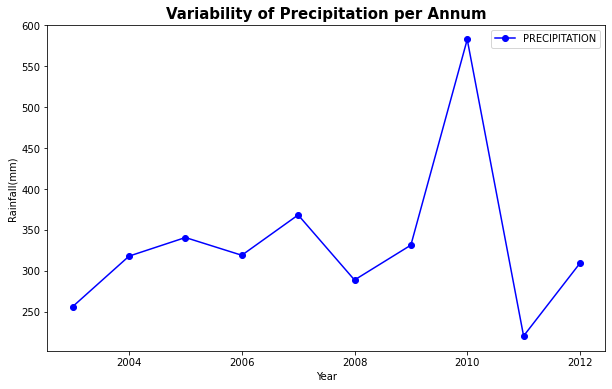

In [8]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annualRR_totals.year,annualRR_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Year")
plt.ylabel("Rainfall(mm)")
plt.title("Variability of Precipitation per Annum",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('1.jpeg');

<p>Dry days</p>

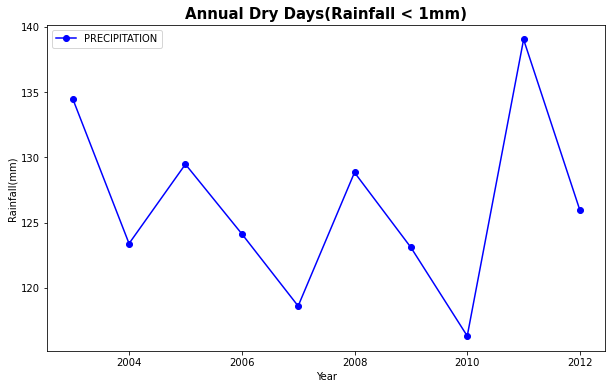

In [16]:
#plotting time series for drydays per year
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_dryDays.year,annual_dryDays.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Year")
plt.ylabel("Rainfall(mm)")
plt.title("Annual Dry Days(Rainfall < 1mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('2.jpeg');

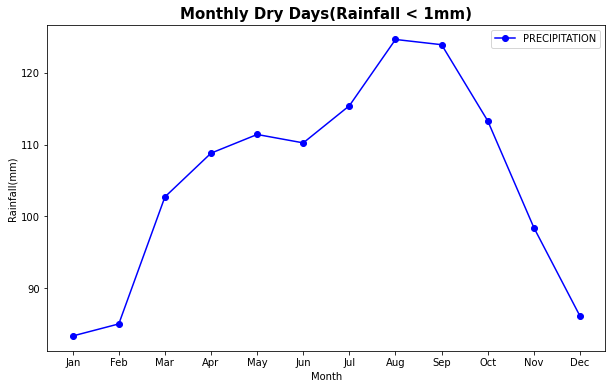

In [9]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(month_names,monthly_dryDays.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Month")
plt.ylabel("Rainfall(mm)")
plt.title("Monthly Dry Days(Rainfall < 1mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('3.jpeg');

<p>Wet days</p>

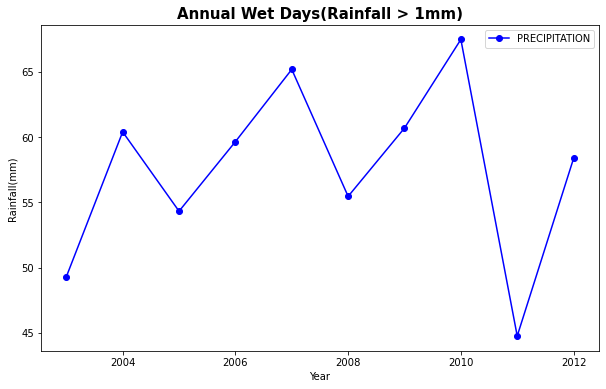

In [10]:
#plotting time series for wetdays per year
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_wetDays.year,annual_wetDays.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Year")
plt.ylabel("Rainfall(mm)")
plt.title("Annual Wet Days(Rainfall > 1mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('4.jpeg');


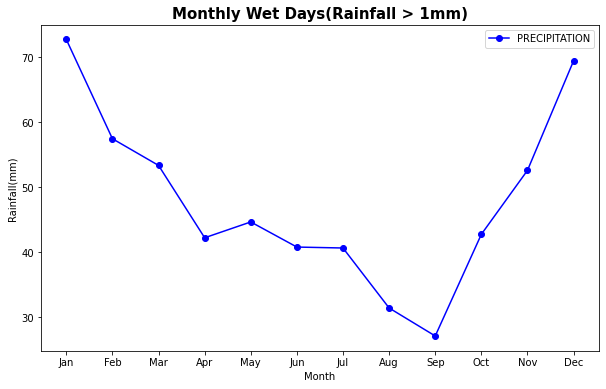

In [11]:
#plotting time series for wetdays per month
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(month_names,monthly_wetDays.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Month")
plt.ylabel("Rainfall(mm)")
plt.title("Monthly Wet Days(Rainfall > 1mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('5.jpeg');

<p>Extreme Rainfall</p>

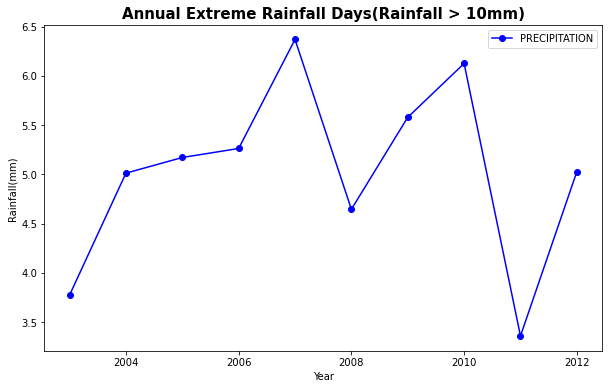

In [12]:
#plotting time series for xtremerr>10mm per year
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_xtremeRR10.year,annual_xtremeRR10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Year")
plt.ylabel("Rainfall(mm)")
plt.title("Annual Extreme Rainfall Days(Rainfall > 10mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('6.jpeg');

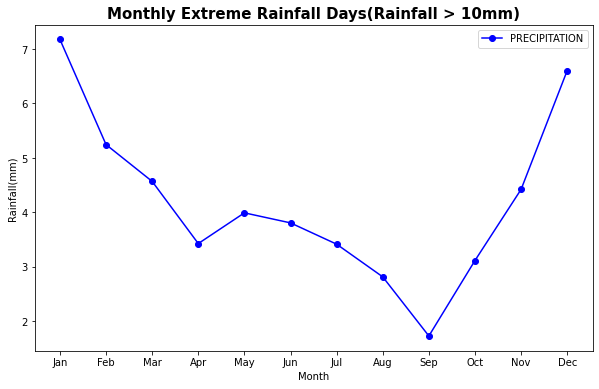

In [13]:
#plotting time series for xtremerr>10mm per month
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(month_names,monthly_xtremeRR10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Month")
plt.ylabel("Rainfall(mm)")
plt.title("Monthly Extreme Rainfall Days(Rainfall > 10mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('7.jpeg');

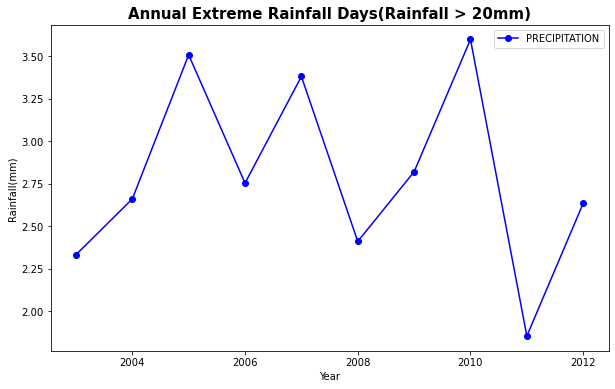

In [14]:
#plotting time series for xtremerr>20mm per year
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_xtremeRR20.year,annual_xtremeRR20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Year")
plt.ylabel("Rainfall(mm)")
plt.title("Annual Extreme Rainfall Days(Rainfall > 20mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('8.jpeg');

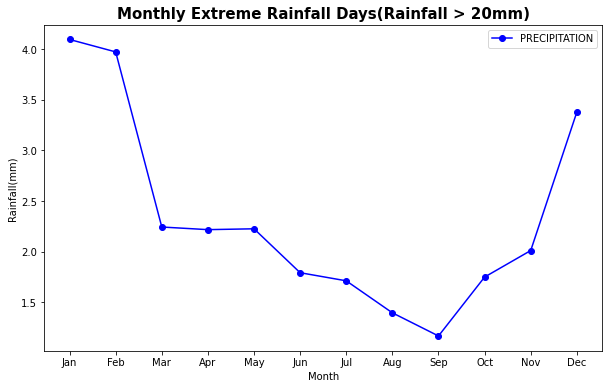

In [15]:
#plotting time series for xtremerr>20mm per month
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(month_names,monthly_xtremeRR20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'PRECIPITATION',marker='o')
plt.xlabel("Month")
plt.ylabel("Rainfall(mm)")
plt.title("Monthly Extreme Rainfall Days(Rainfall > 20mm)",fontweight = 'bold', fontsize=15)
plt.legend()
# plt.show()
plt.savefig('9.jpeg');

<h2 color='blue'>Spatial Plot</h2>
<ul>
    <li>Dry days</li>
    <li>Wet Days</li>
    <li>Extreme Rainfall</li>
</ul>

<p>DRY DAYS</p>

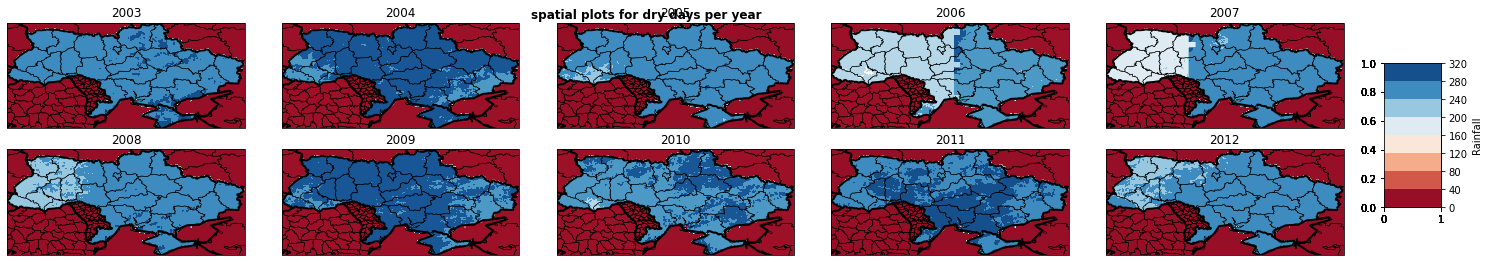

In [39]:
# spatial plots for dry days per year
fig,ax=plt.subplots(2,5,figsize=(32,4), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(annual_dryDays.year.data[i])
    cb= ax[i].contourf(annual_dryDays.lon, annual_dryDays.lat, annual_dryDays[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.6, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('10.jpeg');

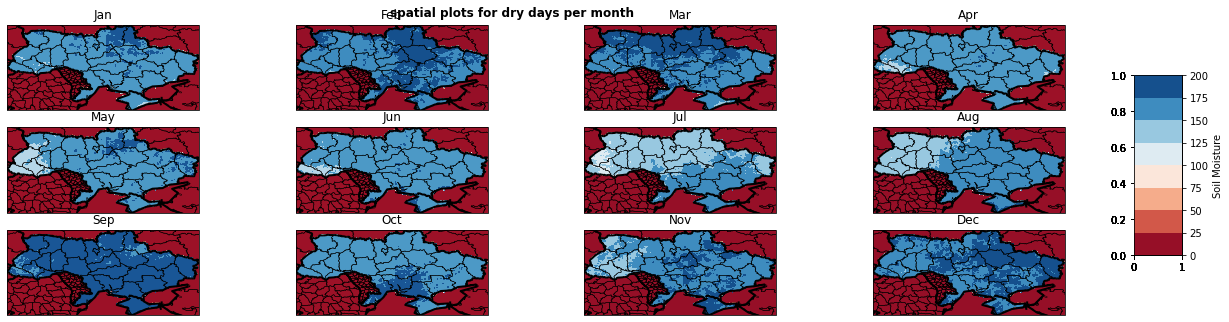

In [41]:
# spatial plots for dry days per month
fig,ax=plt.subplots(3,4,figsize=(27,5), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_dryDays.lon, monthly_dryDays.lat, monthly_dryDays[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('11.jpeg');

<p>WET DAYS</p>

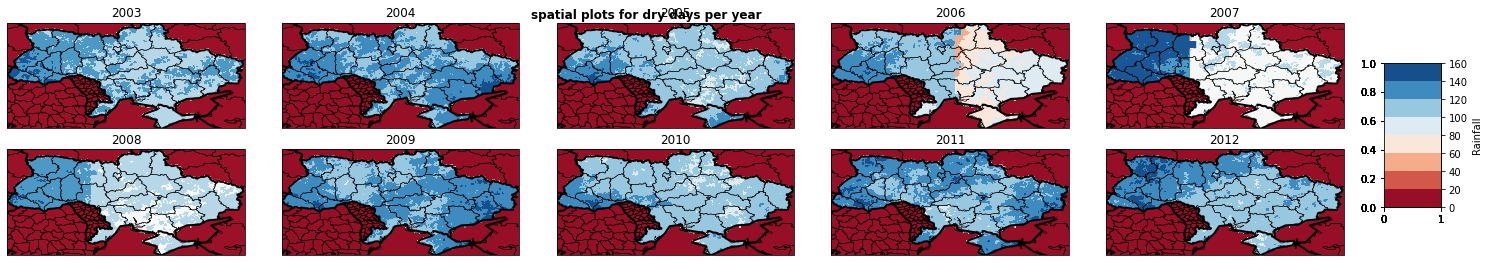

In [16]:
# spatial plots for wet days per year
fig,ax=plt.subplots(2,5,figsize=(32,4), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(annual_wetDays.year.data[i])
    cb= ax[i].contourf(annual_wetDays.lon, annual_wetDays.lat, annual_wetDays[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.6, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('12.jpeg');

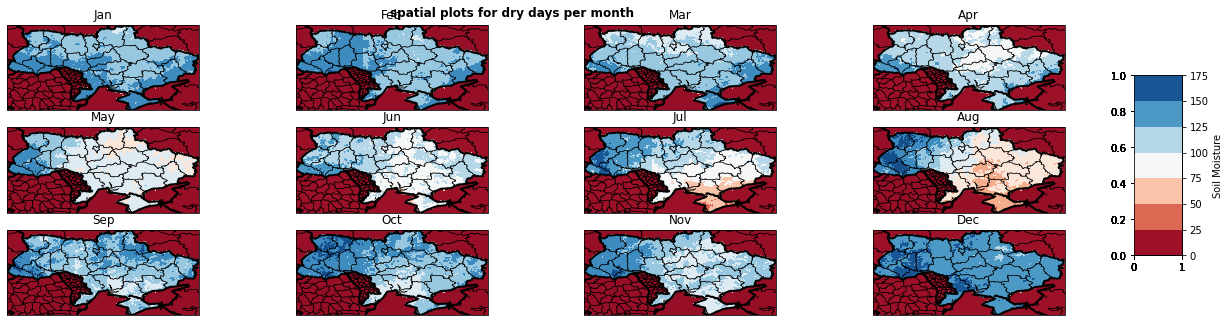

In [17]:
# spatial plots for wet days per month
fig,ax=plt.subplots(3,4,figsize=(27,5), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_wetDays.lon, monthly_wetDays.lat, monthly_wetDays[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('13.jpeg');

<p>EXTREME RAINFALL</p>

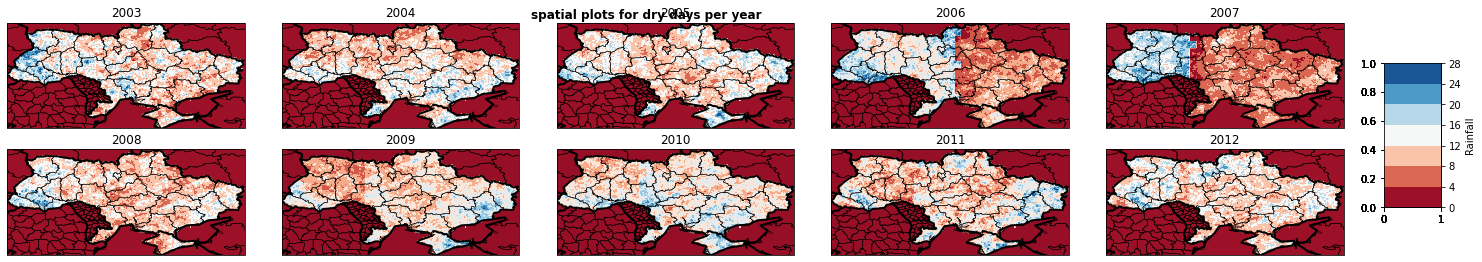

In [18]:
# spatial plots for XTREME RAINFALL >10mm per year
fig,ax=plt.subplots(2,5,figsize=(32,4), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(annual_xtremeRR10.year.data[i])
    cb= ax[i].contourf(annual_xtremeRR10.lon, annual_xtremeRR10.lat, annual_xtremeRR10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.6, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('14.jpeg');

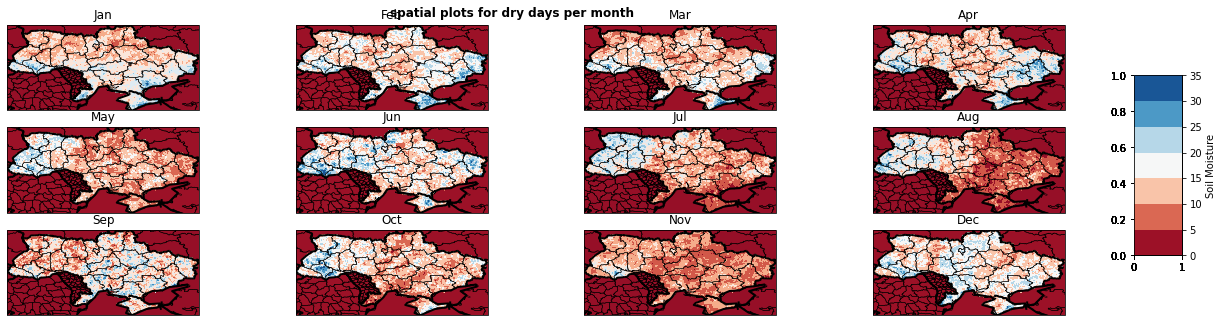

In [19]:
# spatial plots for XTREME RAINFALL >10mm per month
fig,ax=plt.subplots(3,4,figsize=(27,5), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_xtremeRR10.lon, monthly_xtremeRR10.lat, monthly_xtremeRR10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('15.jpeg');

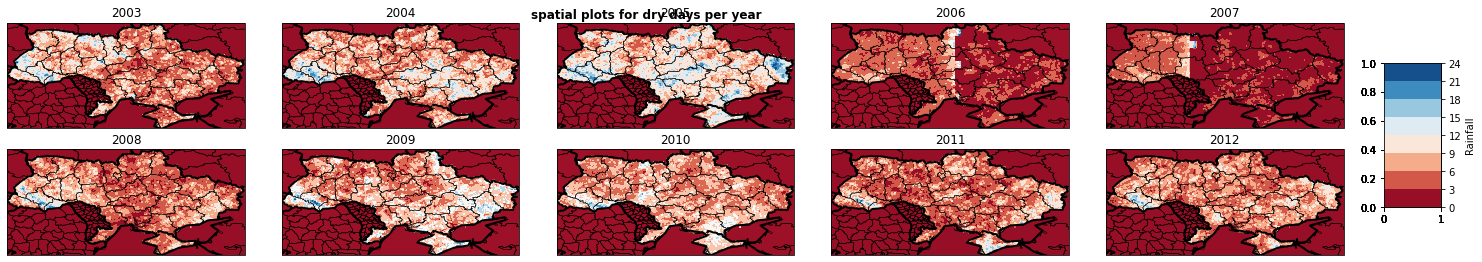

In [20]:
# spatial plots for XTREME RAINFALL >20mm per year
fig,ax=plt.subplots(2,5,figsize=(32,4), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(annual_xtremeRR20.year.data[i])
    cb= ax[i].contourf(annual_xtremeRR20.lon, annual_xtremeRR20.lat, annual_xtremeRR20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Rainfall')
fig.subplots_adjust(wspace=-0.6, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('16.jpeg');

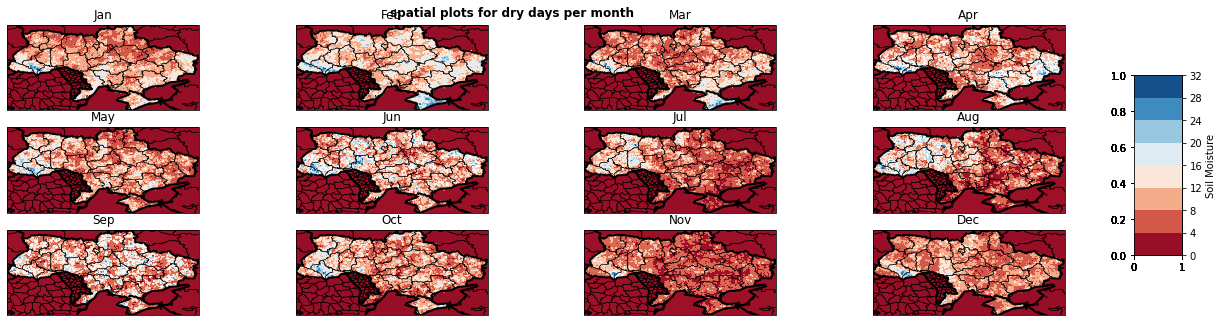

In [21]:
# spatial plots for XTREME RAINFALL >20mm per month
fig,ax=plt.subplots(3,4,figsize=(27,5), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([22.12,40.24,52.44,44.4])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_xtremeRR20.lon, monthly_xtremeRR20.lat, monthly_xtremeRR20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(), zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('17.jpeg');